In [2]:
cd drive/MyDrive/Dacon/LDI/Model

/content/drive/MyDrive/Dacon/LDI/Model


In [3]:
import pickle
import pandas as pd
import numpy as np
with open('../Preprocessed_data/v1/list.txt', 'rb') as f:
    problem_df = pickle.load(f)
with open('../Preprocessed_data/v1/noProblemList.txt', 'rb') as f:
    no_problem_df = pickle.load(f)

In [4]:
problem_df

,user_id,model_nm,fwver,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,errtype_10,errtype_11,errtype_12,errtype_13,errtype_14,errtype_15,errtype_16,errtype_17,errtype_18,errtype_19,errtype_20,errtype_21,errtype_22,errtype_23,errtype_24,errtype_25,errtype_26,errtype_27,errtype_28,errtype_30,errtype_31,errtype_32,errtype_33,errtype_34,errtype_35,errtype_36,errtype_37,errtype_38,errtype_39,errtype_40,errtype_41,errtype_42,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,19224.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
1,23664.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.111111,-0.111111,-0.111111,0.0,0.0,0.888889,-0.111111,0.0,0.0,0.0,3.222222,-0.111111,0.0
2,23664.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.285714,-0.285714,-0.285714,0.0,0.0,0.428571,-0.285714,0.0,0.0,0.0,2.571429,-0.285714,0.0
3,15166.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.910508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.250000,-0.250000,-0.250000,0.0,0.0,0.500000,-0.250000,0.0,0.0,0.0,3.000000,-0.250000,0.0
4,12590.0,1.0,1.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6234,20167.0,0.0,3.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
6235,20167.0,0.0,4.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
6236,16270.0,2.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
6237,19114.0,3.0,9.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0


In [5]:
no_problem_df

,user_id,model_nm,fwver,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,errtype_10,errtype_11,errtype_12,errtype_13,errtype_14,errtype_15,errtype_16,errtype_17,errtype_18,errtype_19,errtype_20,errtype_21,errtype_22,errtype_23,errtype_24,errtype_25,errtype_26,errtype_27,errtype_28,errtype_30,errtype_31,errtype_32,errtype_33,errtype_34,errtype_35,errtype_36,errtype_37,errtype_38,errtype_39,errtype_40,errtype_41,errtype_42,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,10002.0,3.0,9.0,0.0,0.0,0.0,0.0,36.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,-0.045455,0.000000,0.0,0.0,1.363636,2.045455,4.363636,0.0,0.090909,4.318182,-0.045455,0.0
1,10003.0,2.0,5.0,0.0,0.0,0.0,0.0,39.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2307.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,10003.0,2.0,6.0,0.0,0.0,0.0,0.0,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1892.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
3,10007.0,0.0,3.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,10007.0,0.0,4.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13763,24992.0,0.0,4.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
13764,24993.0,3.0,9.0,0.0,0.0,0.0,0.0,36.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.333333,-0.333333,0.0,0.0,1.000000,-0.333333,0.000000,0.0,0.000000,4.000000,-0.333333,0.0
13765,24994.0,3.0,9.0,0.0,0.0,0.0,0.0,36.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
13766,24995.0,2.0,6.0,0.0,0.0,0.0,0.0,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.333333,-0.333333,0.0,0.0,0.500000,-0.333333,0.000000,0.0,0.000000,2.500000,-0.333333,0.0


In [6]:
df_x = pd.concat([problem_df,no_problem_df])
df_x =df_x.drop(['user_id'],axis=1)
df_x

,model_nm,fwver,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,errtype_10,errtype_11,errtype_12,errtype_13,errtype_14,errtype_15,errtype_16,errtype_17,errtype_18,errtype_19,errtype_20,errtype_21,errtype_22,errtype_23,errtype_24,errtype_25,errtype_26,errtype_27,errtype_28,errtype_30,errtype_31,errtype_32,errtype_33,errtype_34,errtype_35,errtype_36,errtype_37,errtype_38,errtype_39,errtype_40,errtype_41,errtype_42,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,-1.095041,-0.568387,-0.102311,NaN,NaN,NaN,-0.883352,NaN,NaN,-0.051507,-0.040925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.398362,NaN,-0.084244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.259354,NaN,NaN,NaN,NaN,-0.015698,0.225303,-0.016636,NaN,NaN,-0.048984,-0.112798,-0.079928,-0.076889,-0.019817,-0.036260,0.532887,-0.079313
1,-1.095041,-0.568387,-0.102311,NaN,NaN,NaN,-0.883352,NaN,NaN,-0.051507,-0.040925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.550034,NaN,-0.084244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.259354,NaN,NaN,NaN,NaN,-0.016031,-0.362504,-0.016967,NaN,NaN,-0.048321,-0.119702,-0.079928,-0.076889,-0.019817,-0.035940,-0.446340,-0.079313
2,-1.095041,-0.183687,-0.102311,NaN,NaN,NaN,-0.883352,NaN,NaN,-0.051507,-0.040925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.132521,NaN,-0.084244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.259354,NaN,NaN,NaN,NaN,-0.016553,-1.286202,-0.017488,NaN,NaN,-0.048664,-0.130551,-0.079928,-0.076889,-0.019817,-0.036005,-1.985124,-0.079313
3,-1.095041,-0.568387,-0.102311,NaN,NaN,NaN,-0.883352,NaN,NaN,-0.051507,-0.040925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.506443,NaN,-0.084244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.259354,NaN,NaN,NaN,NaN,-0.016446,-1.097264,-0.017382,NaN,NaN,-0.048611,-0.128332,-0.079928,-0.076889,-0.019817,-0.035962,-1.670373,-0.079313
4,-0.330213,-1.337785,-0.102311,NaN,NaN,NaN,1.563311,NaN,NaN,-0.051507,-0.040925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.550034,NaN,-0.084244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.259354,NaN,NaN,NaN,NaN,-0.015698,0.225303,-0.016636,NaN,NaN,-0.048984,-0.112798,-0.079928,-0.076889,-0.019817,-0.036260,0.532887,-0.079313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13763,-1.095041,-0.183687,-0.102311,NaN,NaN,NaN,-0.883352,NaN,NaN,-0.051507,-0.040925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.524232,NaN,-0.084244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.259354,NaN,NaN,NaN,NaN,-0.015698,0.225303,-0.016636,NaN,NaN,-0.048984,-0.112798,-0.079928,-0.076889,-0.019817,-0.036260,0.532887,-0.079313
13764,1.199442,1.739809,-0.102311,NaN,NaN,NaN,1.375106,NaN,NaN,-0.051507,-0.040925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.398362,NaN,-0.084244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.259354,NaN,NaN,NaN,NaN,-0.016696,-1.538119,-0.017631,NaN,NaN,-0.048238,-0.133510,-0.079928,-0.076889,-0.019817,-0.035863,-2.404793,-0.079313
13765,1.199442,1.739809,-0.102311,NaN,NaN,NaN,1.375106,NaN,NaN,-0.051507,-0.040925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.398362,NaN,-0.084244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.259354,NaN,NaN,NaN,NaN,-0.015698,0.225303,-0.016636,NaN,NaN,-0.048984,-0.112798,-0.079928,-0.076889,-0.019817,-0.036260,0.532887,-0.079313
13766,0.434614,0.585711,-0.102311,NaN,NaN,NaN,-0.444208,NaN,NaN,-0.051507,-0.040925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.712400,NaN,-0.084244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.259354,NaN,NaN,NaN,NaN,-0.016696,-1.538119,-0.017631,NaN,NaN,-0.048611,-0.133510,-0.079928,-0.076889,-0.019817,-0.036012,-2.404793,-0.079313


In [8]:
y_problem = np.zeros((13768))
y_no_problem = np.ones((6239))
df_y = np.concatenate((y_problem,y_no_problem))
df_y

array([0., 0., 0., ..., 1., 1., 1.])

In [9]:
from sklearn.model_selection import train_test_split
X_t, X_test, y_t, y_test = train_test_split(df_x,df_y, test_size = 0.3, random_state = 11)
X_train, X_val,y_train, y_val = train_test_split(X_t,y_t,test_size=0.2, random_state = 10)
X_train

,model_nm,fwver,errtype_1,errtype_2,errtype_3,errtype_4,errtype_5,errtype_6,errtype_7,errtype_8,errtype_9,errtype_10,errtype_11,errtype_12,errtype_13,errtype_14,errtype_15,errtype_16,errtype_17,errtype_18,errtype_19,errtype_20,errtype_21,errtype_22,errtype_23,errtype_24,errtype_25,errtype_26,errtype_27,errtype_28,errtype_30,errtype_31,errtype_32,errtype_33,errtype_34,errtype_35,errtype_36,errtype_37,errtype_38,errtype_39,errtype_40,errtype_41,errtype_42,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
2615,1.0,1.0,3.0,0.0,0.0,0.0,39.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.994819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.062500,-0.062500,-0.062500,0.0,0.0,49.312500,0.000000,0.1875,0.0,0.0,194.4375,-0.062500,0.0
8814,2.0,6.0,0.0,0.0,0.0,0.0,7.080537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.585366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.0000,0.000000,0.0
2154,2.0,6.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.0000,0.000000,0.0
4540,1.0,1.0,0.0,0.0,0.0,0.0,39.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2059.0,0.0,0.0,0.0,0.0,-0.250000,-0.250000,-0.250000,0.0,0.0,0.500000,-0.250000,0.0000,0.0,0.0,3.0000,-0.250000,0.0
5349,0.0,3.0,0.0,0.0,0.0,0.0,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.333333,-0.333333,0.0,0.0,1.333333,-0.333333,0.0000,0.0,0.0,5.0000,-0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7606,2.0,5.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.0000,0.000000,0.0
659,0.0,3.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.885501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.0000,0.000000,0.0
4855,2.0,6.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.0000,0.000000,0.0
2610,0.0,4.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.0000,0.000000,0.0


In [10]:
y_train

array([0., 1., 0., ..., 0., 0., 0.])

In [20]:
from xgboost import plot_importance
from xgboost import XGBClassifier
eval_set=[(X_val,y_val)]
nes = [100,200,500,1000]
lrs = [0.02,0.05,0.1,0.12]
mds = [3,4,5,6,7,8,9,10]
params = []
score = 0
for ne in nes:
    for lr in lrs:
        for md in mds:
            xgb = XGBClassifier(n_estimators = ne, learning_rate = lr, max_depth = md, objective= 'binary:logistic')
            xgb.fit(X_train,y_train,eval_set = eval_set, eval_metric='auc',early_stopping_rounds = 20,verbose=False)  
            xgb_pred = xgb.predict(X_test)
            xgb_probability = xgb.predict_proba(X_test)
            xgb_prob = xgb_probability[:,1]
            temp_score = roc_auc_score(y_test,xgb_prob)
            print(temp_score)
            if temp_score > score:
                score = temp_score
                params = []
                params.append([ne,lr,md])
print(score)
print(params)
            


0.5853529552914756
0.5812297788659884
0.5832456474813905
0.5850640126133024
0.5855313037844307
0.5851815310687475
0.5805204618009366
0.579145120537955
0.5871117846419945
0.5879725296727629
0.5789331213859517
0.5870182099247183
0.5865275574306739
0.5848546019735335
0.5821257276631455
0.5782372645845192
0.587270784005997
0.5868272424346199
0.5839362625455481
0.5847185109428061
0.5855987345281388
0.5862927793710071
0.5794580716671028
0.5758795829285548
0.5861458813017008
0.587292333370349
0.5884206011405503
0.5865314401990256
0.5825791702938194
0.5816872336906257
0.5775533796521712
0.5768883261463291
0.5853529552914756
0.5812297788659884
0.5832456474813905
0.5850640126133024
0.5855313037844307
0.5851815310687475
0.5806984867298626
0.579145120537955
0.5876569900313806
0.5879725296727629
0.5789331213859517
0.5870182099247183
0.5865275574306739
0.5848546019735335
0.5821257276631455
0.5782372645845192
0.587270784005997
0.5868272424346199
0.5839362625455481
0.5847185109428061
0.585598734528138

In [21]:
 xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.12, max_depth = 5, objective= 'binary:logistic')
xgb.fit(X_train,y_train,eval_set = eval_set, eval_metric='auc',early_stopping_rounds = 20,verbose=False)  
xgb_pred = xgb.predict(X_test)
xgb_probability = xgb.predict_proba(X_test)
xgb_prob = xgb_probability[:,1]
temp_score = roc_auc_score(y_test,xgb_prob)

AxesSubplot(0.125,0.125;0.775x0.755)


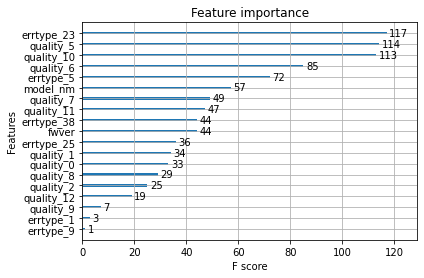

In [26]:
print(plot_importance(xgb))

In [13]:

from sklearn.metrics import roc_auc_score


roc_auc_score(y_test,xgb_pred)
roc_auc_score(y_test,xgb_prob)


0.5782372645845192

In [ ]:
with open('../Preprocessed_data/x_test.txt', 'rb') as f:
    testdata = pickle.load(f)

FileNotFoundError: ignored

In [ ]:
test_pred = xgb.predict_proba(testdata)[:,1]

In [ ]:
test_pred

In [ ]:
seq_user_id = testdata['user_id']
seq_user_id
res_dict = {}
for i,user_id in enumerate(seq_user_id):
    user_id = int(user_id)
    if user_id not in res_dict.keys():
        res_dict[user_id] = test_pred[i]
    else:
        if res_dict[user_id] < test_pred[i]:
            res_dict[user_id] = test_pred[i]
res_dict

In [ ]:
import csv

with open('result.csv','w') as csvfile:
    fieldnames = ['user_id','problem']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(30000,44999):
        if i not in res_dict.keys():
            writer.writerow({'user_id':i,'problem':0})
        else:
            writer.writerow({'user_id':i,'problem':res_dict[i]})

In [ ]:
fieldnames = ['user_id','problem']

In [ ]:
len(res_dict)